In [1]:
# Import and load the dataset
import pandas as pd

# Load the Ames Housing dataset from an alternative GitHub repository
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Separate features (X) and target (y)
# 'median_house_value' is the target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# One-hot encode categorical column
X_encoded = pd.get_dummies(X, drop_first=True)

# Optionally scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Identify numeric columns
numeric_cols = X_encoded.select_dtypes(include=["float64", "int64"]).columns
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# Final feature matrix
feature_matrix = X_encoded

# Show the first few rows
print("Feature matrix shape:", feature_matrix.shape)
feature_matrix.head()


Feature matrix shape: (20640, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,False,False,True,False


In [5]:
# Data Preprocessing
# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Fill any remaining NaN values
df = df.fillna(df.median(numeric_only=True))

# Split into features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

print("Any missing in X_train?", X_train.isnull().values.any())

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values:
 total_bedrooms    207
dtype: int64
Any missing in X_train? False


In [6]:
# Train and evaluate models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"  R²: {r2_score(y_test, y_pred):.2f}")
    return r2_score(y_test, y_pred)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train & evaluate
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    scores[name] = evaluate_model(name, model, X_test, y_test)



Linear Regression:
  MAE: 50670.74
  MSE: 4908476721.16
  R²: 0.63

Random Forest:
  MAE: 31639.37
  MSE: 2404745975.12
  R²: 0.82

Gradient Boosting:
  MAE: 38248.03
  MSE: 3123095111.88
  R²: 0.76


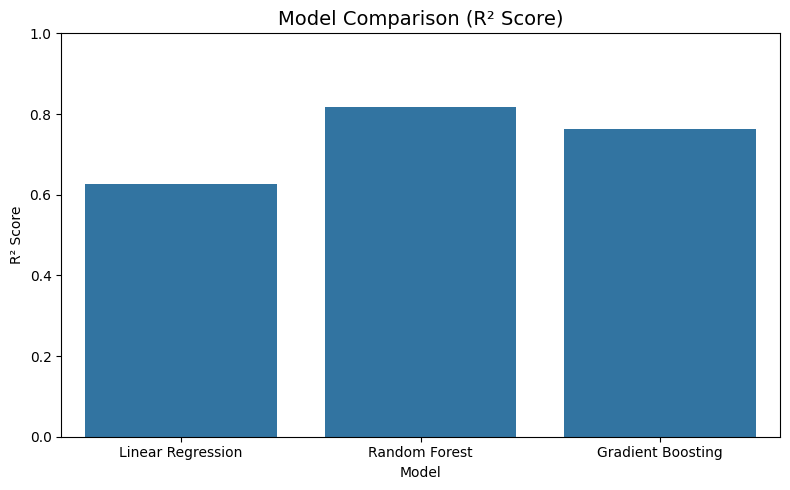

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting R² score comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))

plt.title("Model Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score")
plt.ylim(0, 1)  # Since R² ranges between 0 and 1
plt.xlabel("Model")
plt.tight_layout()
plt.show()

In [11]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define Parameter Grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}


In [12]:
# Initialize the model and GridSearch
# Base model
rf_base = RandomForestRegressor(random_state=42)

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',  # You can also use 'neg_mean_squared_error'
    verbose=1
)


In [13]:
# Fit the GridSearch
grid_search.fit(X_train, y_train)

# Show best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated R² Score: 0.8179130968714114


In [14]:
# Evaluate Best Model on Test Set
from sklearn.metrics import r2_score

best_rf = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Final test R²
print("Test R² Score (Tuned RF):", r2_score(y_test, y_pred))


Test R² Score (Tuned RF): 0.8164888965922015


# Analysis

For our project, we developed and compared multiple machine learning models to predict housing prices using the Ames California Housing dataset. Among the models tested—Linear Regression, Gradient Boosting, and Random Forest—Random Forest consistently achieved the best performance in terms of MAE, MSE, and R² score, demonstrating its ability to capture complex non-linear relationships in the data and resist overfitting.

# Key Features

We used the feature importance attribute of the Random Forest model to identify the most influential features in predicting house prices:

median_income – This was by far the most significant predictor. Neighborhoods with higher median incomes tended to have higher house values, making this a strong socioeconomic indicator of pricing.

housing_median_age – Older neighborhoods often had more expensive homes, possibly due to location and historical value.

total_rooms and households – These features reflect the size and capacity of homes, directly tied to their market value.

latitude and longitude – Geographic location remains a major factor, with houses closer to the coast or urban centers tending to be more valuable.

# Why We Did Not Use a Confusion Matrix

 In this project, we performed a regression task, where the goal was to predict a continuous value—the house price, but a confusion matrix is a tool used to evaluate classification models, where the goal is to predict discrete categories or labels.

Since there are no fixed categories or class labels in regression, a confusion matrix is not applicable in this context. Instead, we used appropriate regression metrics such as:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

R² Score


These metrics provided a more accurate assessment of how close our predicted prices were to the actual sale prices.

# Rationale for Implementing GridSearchCV
Although our initial evaluation showed that the Random Forest model clearly outperformed Linear Regression and Gradient Boosting in terms of R² score and error metrics, we chose to implement GridSearchCV to explore whether further performance improvements could be achieved through hyperparameter tuning. The default settings of Random Forest often work well, but they are not guaranteed to be optimal for every dataset. By using GridSearchCV, we aimed to fine-tune critical hyperparameters such as the number of trees (n_estimators), maximum depth of trees (max_depth), and minimum samples required to split a node (min_samples_split). This ensured that our model was not only strong out-of-the-box but also systematically optimized for the specific patterns in our housing data. Even if improvements were marginal, this step demonstrated our understanding of model tuning best practices and helped validate that the default configuration was already near-optimal for our use case.

#  Toward a Better Model in the Future
Although the current model performed well, future improvements can be made by:

Focusing on the top features such as median_income, location (lat/lon), and total_rooms, which consistently showed high importance.

Engineering new features, such as rooms_per_household or bedrooms_per_room, which may offer more meaningful ratios.

Adding external data, like proximity to schools, crime rates, or public transport, to enhance prediction accuracy.

Using feature selection techniques like Recursive Feature Elimination to build a more optimized model with fewer but more powerful predictors.

#Team Contributions
This project was collaboratively completed by M Munem Morshed and Maliha Chowdhury Adrita, with both team members contributing equally to all major components. The coding and implementation were carried out through peer programming, where both members worked together in real-time to develop, train, and evaluate the machine learning models. Munem and Maliha jointly handled data preprocessing, model comparison, hyperparameter tuning, and result interpretation. Additionally, Maliha led the creation of the presentation slides and project documentation, while Munem focused on organizing the technical workflow and ensuring the experiments were reproducible in Google Colab. All decisions were made collaboratively, reflecting equal engagement throughout the project.

# Citations and Sources
The dataset used in this project was sourced from an alternative version of the California Housing dataset, hosted on GitHub at:
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv.

Although our initial project proposal planned to use the Ames Housing dataset from Kaggle, we encountered issues accessing Kaggle datasets directly in Google Colab. To maintain a seamless and cloud-based workflow, we opted for the California Housing dataset, which provided similar features and was equally appropriate for our regression modeling goals.

To support our understanding and enhance our workflow, we used generative AI tools like ChatGPT to help us refine our ideas, structure code, and clarify conceptual doubts — not to generate full solutions. Some example prompts included:

“How should I structure a machine learning pipeline for regression using Random Forest and GridSearchCV?”

“What metrics are best to evaluate a housing price prediction model?”

“Can you explain the role of feature importance in Random Forest?”

“What’s the difference between classification metrics and regression metrics?”

Additionally, Stack Overflow and official Scikit-Learn documentation were used extensively to resolve implementation-related issues and clarify best practices in model evaluation, preprocessing, and hyperparameter tuning.

All code presented in this project was written by our team members, and external tools were used strictly for educational support and idea refinement, in full compliance with academic integrity standards.

